# Digital Signals Theory

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Audio

## Chapter 3: Convolution

----

##### p. 48, sample code 

##### p. 49, complete code example

In [2]:
import numpy as np
import scipy.signal
from IPython.display import Audio

fs = 8000
duration = 1
f0 = 100

times = np.arange(duration * fs) / fs
x = scipy.signal.square(2 * np.pi * f0 * times)

# delay of k samples..
# try changing this to see what happens
k = 8
# a square wave alternates between all 1s and all -1s 
# for each cycle.
# there are fs // f0 cycles 
# ... divide each cycle by 2 to get k
#     s.t. the 1s cancel out the -1s when added
#     (1st half of cycle is all 1s,
#      2nd half is all -1s)...
#k = fs // f0 // 2

N = len(x)
y = np.zeros(N)

for n in range(N):
    if n >= k:
        y[n] = x[n] + x[n-k]
    else:
        y[n] = x[n]

display('Input x[n]')
display(Audio(data=x, rate=fs))

print()

display(f'Output y[n] = x[n] + x[n-{k}]')
display(Audio(data=y, rate=fs))

'Input x[n]'

'Output y[n] = x[n] + x[n-8]'

----

##### p. 50, complete code example

In [3]:
c1 = 0.5
c2 = -0.5

fs = 8000
duration = 1
f0 = 100

times = np.arange(duration * fs) / fs
x = scipy.signal.square(2 * np.pi * f0 * times)

N = len(x)
y = np.zeros(N)

for n in range(N):
    if n >= 1:
        y[n] = c1 * x[n] + c2 * x[n-1]
    else:
        y[n] = c1 * x[n]

display('Input x[n]')
display(Audio(data=x, rate=fs))

print()

display(f'Output y[n] = {c1} * x[n] + {c2} * x[n-1]')
display(Audio(data=y, rate=fs))

'Input x[n]'

'Output y[n] = 0.5 * x[n] + -0.5 * x[n-1]'

----

##### Definition 3.1 (Convolution)

\begin{flalign}
\qquad y[n] &= \sum_{k=0}^{K-1} h[k] \cdot x[n-k]  & \\\\ 
\qquad  &= h[0] \cdot x[n-0] + & \\
\qquad  &= \ldots + & \\
\qquad  &= h[K-1] \cdot x[n-(K-1)]  & \\
\end{flalign}

----

##### pp. 58, 59 complete code example


Please see:
* [`IPython.display.Audio` docs](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Audio)
* [`soundfile` Python library](https://github.com/bastibe/python-soundfile)

In [4]:
import soundfile

fin1 = 'bin/128822__mtcband__chord-16.wav'
print(soundfile.info(fin1))

print()

fin2 = 'bin/474296__snapssound__ir_church_01.wav'
print(soundfile.info(fin2))

bin/128822__mtcband__chord-16.wav
samplerate: 44100 Hz
channels: 2
duration: 2.200 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

bin/474296__snapssound__ir_church_01.wav
samplerate: 44100 Hz
channels: 2
duration: 2.952 s
format: WAVEX (Microsoft) [WAVEX]
subtype: Signed 24 bit PCM [PCM_24]


In [5]:
stereo_x, fs1 = soundfile.read(fin1)

stereo_h, fs2 = soundfile.read(fin2)

assert fs1 == fs2

print(f"stereo_h: {type(stereo_h)}, shape is {stereo_h.shape}")
print(f"stereo_x: {type(stereo_x)}, shape is {stereo_x.shape}")

stereo_h: <class 'numpy.ndarray'>, shape is (130176, 2)
stereo_x: <class 'numpy.ndarray'>, shape is (97020, 2)


In [6]:
display('STEREO impulse response')
display(Audio(data=stereo_h.T, rate=fs2))

print()

display('STEREO input signal')
display(Audio(data=stereo_x.T, rate=fs1))

'STEREO impulse response'

'STEREO input signal'

NOTE that as the 2 WAV files used are both in stereo (2 channels), we need to convert to mono in order to follow along with the book.

Please see [this answer to this question on Stackoverflow: Stereo to Mono wav in Python](https://stackoverflow.com/questions/30401042/stereo-to-mono-wav-in-python/30402931#30402931) for clues on how to transform a sound wave stereo to mono.

In [7]:
# simply take the combined average of the left- and right-channel
# arrays
mono_h = stereo_h[:,0]/2 + stereo_h[:,1]/2
#print(mono_h.shape)
mono_x = stereo_x[:,0]/2 + stereo_x[:,1]/2
#print(mono_x.shape)

display('MONO impulse response')
display(Audio(data=mono_h.T, rate=fs2))

print()

display('MONO input signal')
display(Audio(data=mono_x.T, rate=fs1))

'MONO impulse response'

'MONO input signal'

In [8]:
y = np.convolve(mono_x, mono_h)

display('MONO output signal')
display(Audio(data=y, rate=fs2))

'MONO output signal'

----

##### 3.4.1 Full mode convolution, p. 60 complete code example

Please read [API documentation for `numpy.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)

In [9]:
# FULL mode
x = np.arange(5, 10)

h = np.array([1, 0, -1])

y = np.convolve(x, h, mode='full')

print('Input             :\t', x)
print('Filter            :\t', h)
print('FULL convolution  :\t', y)

Input             :	 [5 6 7 8 9]
Filter            :	 [ 1  0 -1]
FULL convolution  :	 [ 5  6  2  2  2 -8 -9]


##### 3.4.2 Valid mode convolution, pp. 60,61 complete code example

In [10]:
# VALID mode
y = np.convolve(x, h, mode='valid')

print('Input             :\t', x)
print('Filter            :\t', h)
print('VALID convolution :\t', y)

Input             :	 [5 6 7 8 9]
Filter            :	 [ 1  0 -1]
VALID convolution :	 [2 2 2]


##### 3.4.3 Same mode convolution, pp. 60,61 complete code example

In [11]:
# SAME mode
y = np.convolve(x, h, mode='same')

print('Input             :\t', x)
print('Filter            :\t', h)
print('SAME convolution  :\t', y)

Input             :	 [5 6 7 8 9]
Filter            :	 [ 1  0 -1]
SAME convolution  :	 [ 6  2  2  2 -8]


In [12]:
# SAME, left-aligned...
#       discard the ring-out 
N = len(x)
y = np.convolve(x, h, mode='full')
y = y[:N]

print('Input             :\t', x)
print('Filter            :\t', h)
print('SAME (left-align) :\t', y)

Input             :	 [5 6 7 8 9]
Filter            :	 [ 1  0 -1]
SAME (left-align) :	 [5 6 2 2 2]


In [13]:
# SAME, right-aligned...
#       discard the warm-up
N = len(x)
y = np.convolve(x, h, mode='full')
y = y[-N:]

print('Input             :\t', x)
print('Filter            :\t', h)
print('SAME (right-align):\t', y)

Input             :	 [5 6 7 8 9]
Filter            :	 [ 1  0 -1]
SAME (right-align):	 [ 2  2  2 -8 -9]


----

### 3.7 Exercises

#### Exercise 3.1

For each of the systems below, what is its impulse response?

We obtain the impulse response $h[n]$ by setting $x[n] = \delta[n]$, and the setting $y[n] = h[n]$.

\begin{flalign}
\qquad \text{1.} \quad y[n] &= x[n] - x[n-1] &
\\\\ 
\qquad \Rightarrow \quad h[n] &= \delta[n] - \delta[n-1] &
\end{flalign}

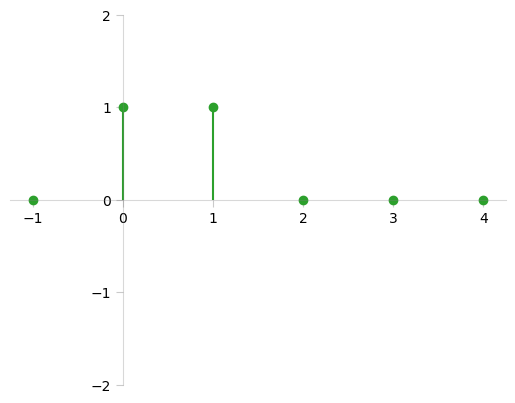

In [14]:
values = [ 0, 1, 1, 0, 0, 0]
x = np.arange(-1, 5)

fig, ax = plt.subplots()

ax.grid(False)
ax.stem(x, values, basefmt=' ', linefmt='C2-')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.3)
ax.set_xticks([-1,  0, 1, 2, 3, 4])
ax.tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0.3)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{2.} \quad y[n] &= 2 \cdot x[n] + x[n-2] &
\\\\ 
\qquad \Rightarrow \quad h[n] &= 2 \cdot \delta[n] + \delta[n-2] &
\end{flalign}

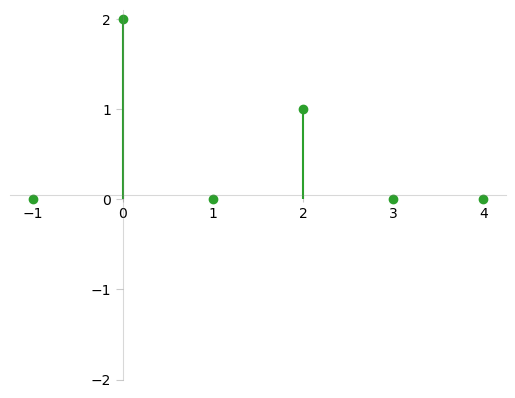

In [15]:
values = [ 0, 2, 0, 1, 0, 0]
x =      [-1, 0, 1, 2, 3, 4]

fig, ax = plt.subplots()

ax.grid(False)
ax.stem(x, values, basefmt=' ', linefmt='C2-')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.3)
ax.set_xticks([-1,  0, 1, 2, 3, 4])
ax.tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0.3)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.show()

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{3.} \quad y[n] &= \frac{1}{3} \cdot \left(  x[n-2] + x[n-3] + x[n-4] \right) &
\\\\ 
\qquad \Rightarrow \quad h[n] &= \frac{1}{3} \cdot \left(  \delta[n-2] + \delta[n-3] + \delta[n-4] \right) &
\end{flalign}

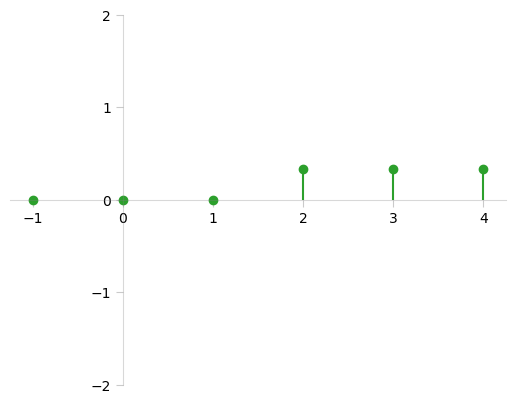

In [16]:
values = [ 0, 0, 0, 1/3, 1/3, 1/3]
x =      [-1, 0, 1, 2, 3, 4]

fig, ax = plt.subplots()

ax.grid(False)
ax.stem(x, values, basefmt=' ', linefmt='C2-')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Move left y-axis, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.3)
ax.set_xticks([-1,  0, 1, 2, 3, 4])
ax.tick_params(axis='y', which=u'both', length=5, color='#96969680')

# Move bottom x-axis, passing through center of plot
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0.3)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.tick_params(axis='x', which=u'both', length=5, color='#96969680')

plt.show()

----

#### Exercise 3.2

Given:
1. $x$ is a signal of length $N=100$ samples
2. impulse response $h$ has length $K=11$ samples

How many samples will $y = h * x$ have for the following convolution modes?

In [17]:
N = 100
K = 11

x = np.zeros(N)
h = np.zeros(K)

<hr style="width:50%;border-top:1px dashed;"/>

1. Full: length of $y = h * x$ is $N + K - 1$

From [`numpy.convolve` API documentation](https://numpy.org/doc/2.1/reference/generated/numpy.convolve.html#numpy-convolve)
> By default, mode is ‘full’. This returns the convolution at each point of overlap,<br/>
> with an output shape of (N+K-1,). At the end-points of the convolution, the signals<br/>
> do not overlap completely, and boundary effects may be seen.

In [18]:
y = np.convolve(x, h)   # default mode is full
print(f"length of y in full mode convolution: {len(y)}")

length of y in full mode convolution: 110


<hr style="width:50%;border-top:1px dashed;"/>

2. Valid: length of $y = h * x$ is $N - K + 1$

From [`numpy.convolve` API documentation for `mode='valid'`](https://numpy.org/doc/2.1/reference/generated/numpy.convolve.html#numpy-convolve)
> Mode 'valid' returns output of length $max(K, N) - min(K, N) + 1$. <br/>
> The convolution product is only given for points where the signals overlap <br/>
> completely. Values outside the signal boundary have no effect

In [19]:
y = np.convolve(x, h, mode='valid')
print(f"length of y in valid mode convolution: {len(y)}")

length of y in valid mode convolution: 90


<hr style="width:50%;border-top:1px dashed;"/>

3. Valid: length of $y = h * x$ is $N$

From 3.4.4, we see that mode Same (centered) can be obtained via `numpy.convolve(x, h, mode='same')`.

From [`numpy.convolve` API documentation for `mode='same'`](https://numpy.org/doc/2.1/reference/generated/numpy.convolve.html#numpy-convolve)
> Mode 'same' returns output of length $max(K, N)$. Boundary effects are still visible.

In [20]:
y = np.convolve(x, h, mode='same')
print(f"length of y in same (centered) mode convolution: {len(y)}")

length of y in same (centered) mode convolution: 100


----

#### Exercise 3.3

For the following systems, determine: _linear_, _shift-invariant_, _both_ or _neither_?

\begin{flalign}
\qquad \text{1.} \quad y[n] &= -x[n] &
\end{flalign}

From the three proofs below, we see that this sytem is _linear_ and _shift-invariant_.

##### Linearity: Homogeneity (scaling)

\begin{flalign}
\qquad \text{given } \quad y[n] &= -1 \cdot x[n] & \\
\qquad \text{ } \quad g[n] &= y ( f[n]  )& \\\\
\qquad \text{if } \quad f[n] &= \alpha \cdot x[n] & \\
\qquad \text{ } \quad g[n] &=y \left( f[n] \right)\stackrel{?}{=} \alpha \cdot y[n] & \\\\
\qquad \text{ } \quad g[n] &= y ( f[n]  )& \\
\qquad \text{ } \quad &= -1 \cdot f[n] & \\
\qquad \text{ } \quad &= -1 \cdot \alpha \cdot x[n] & \\
\qquad \text{ } \quad &= \alpha \cdot \left( -1 \cdot x[n] \right) & \\
\qquad \text{ } \quad &= \alpha \cdot y[n] & \\\\
\qquad \rightarrow \text{homogeneity (scaling) holds} &&
\end{flalign}

##### Linearity: Additivity

\begin{flalign}
\qquad \text{given } \quad y_{1}[n] &= -1 \cdot x_{1}[n] & \\
\qquad \text{ } \quad y_{2}[n] &= -1 \cdot x_{2}[n] & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= x_{1}[n] + x_{2}[n] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y_{1}[n] + y_{2}[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= -1 \cdot f[n] & \\
\qquad \text{ } \quad &= -1 \left( x_{1}[n] + x_{2}[n] \right) & \\
\qquad \text{ } \quad &= -1 \cdot x_{1}[n] + -1 \cdot x_{2}[n] & \\
\qquad \text{ } \quad &= y_{1}[n] + y_{2}[n] & \\\\
\qquad \rightarrow \text{additivity holds} &&
\end{flalign}

##### Shift-invariance

\begin{flalign}
\qquad \text{given } \quad y[n] &= -1 \cdot x[n] & \\
\qquad \text{ } \quad g[n] &= -1 \cdot f[n]  & \\\\
\qquad \text{if } \quad f[n] &= x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y[n - n_{0}] & \\\\
\qquad \text{ } \quad y[n - n_{0}] &= -1 \cdot x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &= -1 \cdot f[n] & \\
\qquad \text{ } \quad  &= -1 \cdot x[n - n_{0}] & \\
\qquad \text{ } \quad  &= y[n - n_{0}] & \\\\
\qquad \rightarrow \text{shift-invariance holds} &&
\end{flalign}

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{2.} \quad y[n] &= x[0] &
\end{flalign}


From the three proofs below, we see that this sytem is _linear_ and _shift-invariant_.

##### Linearity: Homogeneity (scaling)

\begin{flalign}
\qquad \text{given } \quad y[n] &= x[0] & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= \alpha \cdot x[n] & \\
\qquad \text{ } \quad g[n] &=y \left( f[n] \right)\stackrel{?}{=} \alpha \cdot y[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= \alpha \cdot x[0] & \\
\qquad \text{ } \quad &= \alpha \cdot y[n] & \\\\
\qquad \rightarrow \text{homogeneity (scaling) holds} &&
\end{flalign}

##### Linearity: Additivity

\begin{flalign}
\qquad \text{given } \quad y_{1}[n] &= x_{1}[0] & \\
\qquad \text{ } \quad y_{2}[n] &= x_{2}[0] & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[0] &= x_{1}[0] + x_{2}[0] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y_{1}[n] + y_{2}[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= f[0] & \\
\qquad \text{ } \quad &= x_{1}[0] + x_{2}[0] & \\
\qquad \text{ } \quad &= y_{1}[n] + y_{2}[n] & \\\\
\qquad \rightarrow \text{additivity holds} &&
\end{flalign}

##### Shift-invariance

\begin{flalign}
\qquad \text{given } \quad y[n] &= x[0] & \\
\qquad \text{ } \quad g[n] &= f[n] = f[0] & \\\\
\qquad \text{if } \quad f[n] &= x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y[n - n_{0}] & \\\\
\qquad \text{ } \quad y[n - n_{0}] &= x[0] & \\
\qquad \text{ } \quad g[n] &= f[n] & \\
\qquad \text{ } \quad  &= -1 \cdot x[n - n_{0}] & \\
\qquad \text{ } \quad  &= y[n - n_{0}] & \\\\
\qquad \rightarrow \text{shift-invariance holds} &&
\end{flalign}

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{3.} \quad y[n] &= \frac{1}{2} \cdot \left| x[n] + x[n-1] \right| &
\end{flalign}

From the three proofs below, we see that this sytem is _not linear_, but is _shift-invariant_.

##### Homogeneity (scaling)

\begin{flalign}
\qquad \text{given } \quad y[n] &= \frac{1}{2} \cdot \left| x[n] + x[n-1] \right| & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= \alpha \cdot x[n] & \\
\qquad \text{ } \quad g[n] &=y \left( f[n] \right)\stackrel{?}{=} \alpha \cdot y[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= \frac{1}{2} \cdot \left| \alpha \cdot x[n] + \alpha \cdot  x[n-1] \right|  & \\
\qquad \text{ } \quad &= \alpha \cdot \left( \frac{1}{2} \cdot \left| x[n] + x[n-1] \right| \right) & \\
\qquad \text{ } \quad &= \alpha \cdot y[n] & \\\\
\qquad \rightarrow \text{homogeneity holds only if } \alpha \text{ is positive} &&
\end{flalign}

##### Additivity

\begin{flalign}
\qquad \text{given } \quad y_{1}[n] &= \frac{1}{2} \cdot \left| x_{1}[n] + x_{1}[n-1] \right| & \\
\qquad \text{ } \quad y_{2}[n] &= \frac{1}{2} \cdot \left| x_{2}[n] + x_{2}[n-1] \right| & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= x_{1}[n] + x_{2}[n] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y_{1}[n] + y_{2}[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= \frac{1}{2} \cdot \left| (x_{1}[n] + x_{2}[n]) + (x_{1}[n-1] + x_{2}[n-1]) \right| & \\
\qquad \text{ } \quad &= \frac{1}{2} \cdot \left| x_{1}[n] + x_{1}[n-1] + x_{2}[n] + x_{2}[n-1] \right| & \\
\qquad \text{ } \quad &= \frac{1}{2} \cdot \left| x_{1}[n] + x_{1}[n-1] \right| + \frac{1}{2} \cdot \left| x_{2}[n] + x_{2}[n-1] \right| & \\
\qquad \text{ } \quad &= y_{1}[n] + y_{2}[n] & \\\\
\qquad \rightarrow \text{additivity holds} &&
\end{flalign}

##### Shift-invariance

\begin{flalign}
\qquad \text{given } \quad y[n] &= \frac{1}{2} \cdot \left| x[n] + x[n-1] \right| & \\
\qquad \text{ } \quad g[n] &= \frac{1}{2} \cdot \left| f[n] + f[n-1] \right| & \\\\
\qquad \text{if } \quad f[n] &= x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y[n - n_{0}] & \\\\
\qquad \text{ } \quad y[n - n_{0}] &= \frac{1}{2} \cdot \left| x[n - n_{0}]] + x[n - n_{0} - 1] \right| & \\
\qquad \text{ } \quad g[n] &= \frac{1}{2} \cdot \left| f[n] + f[n-1] \right| & \\
\qquad \text{ } \quad  &= \frac{1}{2} \cdot \left| x[n - n_{0}]] + x[n - n_{0} - 1] \right| & \\
\qquad \text{ } \quad  &= y[n - n_{0}] & \\\\
\qquad \rightarrow \text{shift-invariance holds} &&
\end{flalign}

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{4.} \quad y[n] &= 20 &
\end{flalign}

From the three proofs below, we see that this sytem is _not linear_, but is _shift-invariant_.

##### Homogeneity (scaling)

\begin{flalign}
\qquad \text{given } \quad y[n] &= 20 & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= \alpha \cdot x[n] & \\
\qquad \text{ } \quad g[n] &=y \left( f[n] \right)\stackrel{?}{=} \alpha \cdot y[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= 20  & \\
\qquad \text{ } \quad &\ne \alpha \cdot y[n] & \\\\
\qquad \rightarrow \text{homogeneity does not hold} &&
\end{flalign}

##### Additivity

\begin{flalign}
\qquad \text{given } \quad y_{1}[n] &= 20 & \\
\qquad \text{ } \quad y_{2}[n] &= 20 & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= x_{1}[n] + x_{2}[n] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y_{1}[n] + y_{2}[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= 20 & \\
\qquad \text{ } \quad &\ne y_{1}[n] + y_{2}[n] & \\\\
\qquad \rightarrow \text{additivity does not hold} &&
\end{flalign}

##### Shift-invariance

\begin{flalign}
\qquad \text{given } \quad y[n] &= 20 & \\
\qquad \text{ } \quad g[n] &= f[n] & \\\\
\qquad \text{if } \quad f[n] &= x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y[n - n_{0}] & \\\\
\qquad \text{ } \quad y[n - n_{0}] &= 20 & \\
\qquad \text{ } \quad g[n] &= 20 & \\
\qquad \text{ } \quad  &= y[n - n_{0}] & \\\\
\qquad \rightarrow \text{shift-invariance holds} &&
\end{flalign}

<hr style="width:50%;border-top:1px dashed;"/>

\begin{flalign}
\qquad \text{5.} \quad y[n] &= n^{2} &
\end{flalign}

From the three proofs below, we see that this sytem is _not linear_, and is _not shift-invariant_.

##### Homogeneity (scaling)

\begin{flalign}
\qquad \text{given } \quad y[n] &= n^{2} & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= \alpha \cdot x[n] & \\
\qquad \text{ } \quad g[n] &=y \left( f[n] \right)\stackrel{?}{=} \alpha \cdot y[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= n^{2}  & \\
\qquad \text{ } \quad &\ne \alpha \cdot y[n] & \\\\
\qquad \rightarrow \text{homogeneity does not hold} &&
\end{flalign}

##### Additivity

\begin{flalign}
\qquad \text{given } \quad y_{1}[n] &= n^{2} & \\
\qquad \text{ } \quad y_{2}[n] &= n^{2} & \\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\\\
\qquad \text{if } \quad f[n] &= x_{1}[n] + x_{2}[n] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y_{1}[n] + y_{2}[n] & \\\\
\qquad \text{ } \quad g[n] &= y \left( f[n] \right) & \\
\qquad \text{ } \quad &= n^{2} & \\
\qquad \text{ } \quad &\ne y_{1}[n] + y_{2}[n] & \\\\
\qquad \rightarrow \text{additivity does not hold} &&
\end{flalign}

##### Shift-invariance

\begin{flalign}
\qquad \text{given } \quad y[n] &= n^{2} & \\
\qquad \text{ } \quad g[n] &= f[n] & \\\\
\qquad \text{if } \quad f[n] &= x[n - n_{0}] & \\
\qquad \text{ } \quad g[n] &\stackrel{?}{=} y[n - n_{0}] & \\\\
\qquad \text{ } \quad y[n - n_{0}] &= \left( n - n_{0} \right)^{2} & \\
\qquad \text{ } \quad g[n] &= f[n] & \\
\qquad \text{ } \quad  &= n^{2} & \\
\qquad \text{ } \quad  &\ne y[n - n_{0}] & \\\\
\qquad \rightarrow \text{shift-invariance does not hold} &&
\end{flalign}

----

#### Exercise 3.4

Using [Piano a4 sound](https://freesound.org/people/Teddy_Frost/sounds/334534/) as our signal $x$, compute $y = h * x$ where $h$ is a moving average filter with $K = 1, 4, 16, 64, 256, 1024$.

##### Original signal

NOTE that we must first convert the original signal from stereo to mono.

In [21]:
fin3 = 'bin/334534__teddy_frost__piano-a4-sound.wav'
print(soundfile.info(fin3))

bin/334534__teddy_frost__piano-a4-sound.wav
samplerate: 44100 Hz
channels: 2
duration: 2.245 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


In [22]:
stereo_x, fs3 = soundfile.read(fin3)
mono_x = stereo_x[:,0]/2 + stereo_x[:,1]/2

print()

display('MONO input signal x: piano, concert pitch A4')
display(Audio(data=mono_x.T, rate=fs3))

'MONO input signal x: piano, concert pitch A4'

<hr style="width:50%;border-top:1px dashed;"/>

##### Map $K$ to $y$

Map the convolutions of $y = h_{k} * x$ for $k \in K$ to a string $K=k$ that will serve as a key into a `dict`

In [23]:
ys = {
    f"K={4**k}": np.convolve(mono_x, 1/4**k * np.ones(4**k))
    for k in range(6)
}

##### Listen to each resulting $y$

* How does each $y$ sound compare to the original signal?
* Notice any artifacts?

In [24]:
for k,y in ys.items():
    print()
    display(f'MONO input signal x convolved w/ MA filter at {k}')
    display(Audio(data=y, rate=fs3))

'MONO input signal x convolved w/ MA filter at K=1'

'MONO input signal x convolved w/ MA filter at K=4'

'MONO input signal x convolved w/ MA filter at K=16'

'MONO input signal x convolved w/ MA filter at K=64'

'MONO input signal x convolved w/ MA filter at K=256'

'MONO input signal x convolved w/ MA filter at K=1024'

<hr style="width:50%;border-top:1px dashed;"/>

##### Compare the waveforms of the signals

From which value of $K$ can we actually start to hear the difference (artifacts)? Comparing the waveforms for each signal will give you a visual clue.


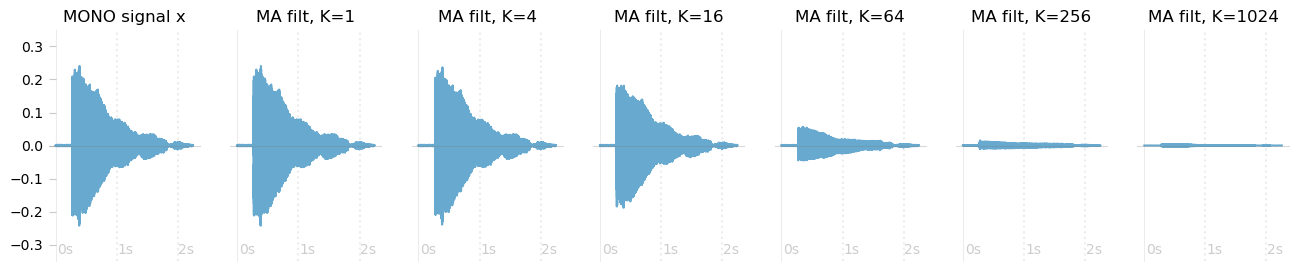

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))

titles = ['MONO signal x', *[f'MA filt, {k}' for k in ys.keys()]]
signals = [mono_x, *ys.values()]


for i in range(len(ax)):
    # Eliminate upper and right axes
    ax[i].spines['right'].set_color('none')
    ax[i].spines['top'].set_color('none')
    # shift left spine as Y-axis
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['left'].set_color('grey')
    ax[i].spines['left'].set_alpha(0.15)
    # shift bottom spine as X-axis
    ax[i].spines['bottom'].set_position('center')
    ax[i].spines['bottom'].set_color('grey')
    ax[i].spines['bottom'].set_alpha(0.3)
    ax[i].set_xticks([])
    # add vline for 1s, 2s mark
    ax[i].axvline(x=fs3, color='grey', alpha=0.15, linestyle=':')
    ax[i].axvline(x=2*fs3, color='grey', alpha=0.15, linestyle=':')
    ax[i].text(.11, 0.02, '0s',
        color='grey', alpha=0.4,
        horizontalalignment='center',
        verticalalignment='bottom',
        rotation='horizontal',
        transform=ax[i].transAxes
    )
    ax[i].text(.51, 0.02, '1s',
        color='grey', alpha=0.4,
        horizontalalignment='center',
        verticalalignment='bottom',
        rotation='horizontal',
        transform=ax[i].transAxes
    )
    ax[i].text(.91, 0.02, '2s',
        color='grey', alpha=0.4,
        horizontalalignment='center',
        verticalalignment='bottom',
        rotation='horizontal',
        transform=ax[i].transAxes
    )
    if ax[i].get_subplotspec().is_first_col():
        ax[i].tick_params(axis='y', which=u'both', length=5, color='#96969680')
    else:
        ax[i].set_yticks([])
        ax[i].tick_params(labelleft=False)       
    # now, plot the signal
    ax[i].plot(signals[i], color='#67a9cf')
    ax[i].set_ylim(bottom=-0.35, top=0.35)
    ax[i].set_title(titles[i])

plt.show()